# Polars vs Pandas

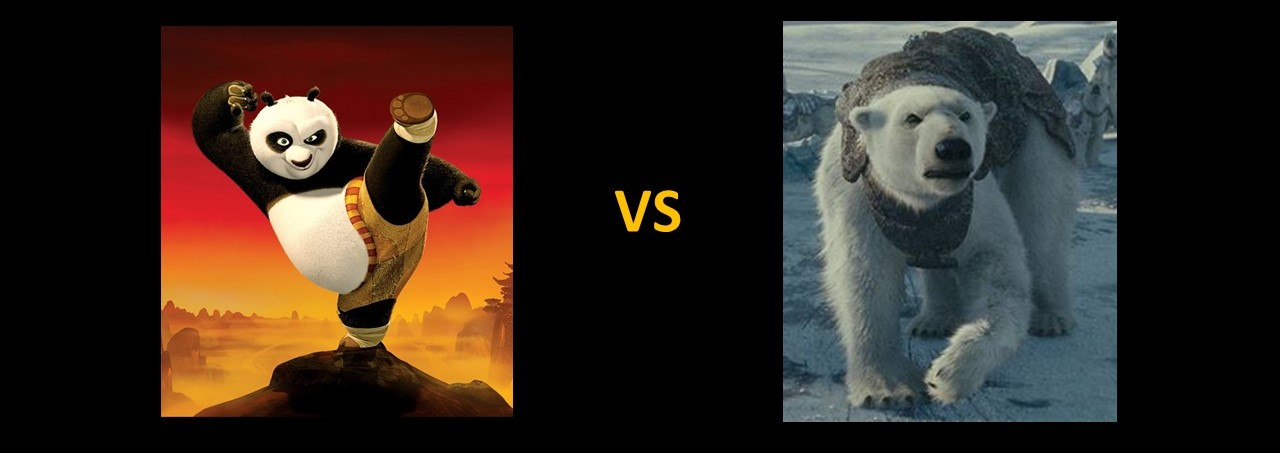

In [21]:
from IPython import display
display.Image("versus1.jpg")

**Polars** 

*Opponents in the ring!*

In [22]:
import pandas as pd
import polars as pl

In [23]:
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def to_other_formats( path):
    df= pd.read_csv(path)
    df.to_excel(path.replace('csv', 'xlsx'), index = False)
    df.to_parquet(path.replace('csv', 'parquet'), index = False)   

In [25]:
%%time
files = ['battles.csv', 'character-deaths.csv', 'character-predictions.csv']
for i in files:
    to_other_formats(i)   

Wall time: 1.07 s


### Round I Reading files

*CSV*

In [26]:
%%time
character_predictions_pandas = pd.read_csv('character-predictions.csv')

Wall time: 16 ms


In [27]:
%%time
character_predictions_polars = pl.read_csv('character-predictions.csv')

Wall time: 2.05 ms


*EXCEL*

In [28]:
%%time
character_predictions_pandas = pd.read_excel('character-predictions.xlsx')

Wall time: 630 ms


In [29]:
%%time
character_predictions_polars = pl.read_excel('character-predictions.xlsx')

Wall time: 235 ms


*PARQUET*

In [30]:
%%time
character_predictions_pandas = pd.read_parquet('character-predictions.parquet')

Wall time: 14.5 ms


In [31]:
%%time
character_predictions_polars = pl.read_parquet('character-predictions.parquet')

Wall time: 2.8 ms


**Displaying tables**

In [32]:
%%time
character_predictions_pandas

Wall time: 0 ns


,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,None,1,None,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,None,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,None,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,None,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,None,1,None,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,None,1,None,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,None,1,None,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


In [33]:
%%time
character_predictions_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [34]:
%%time
character_predictions_polars.dtypes

Wall time: 0 ns


[Int64,
 Int64,
 Int64,
 Float64,
 Float64,
 Utf8,
 Utf8,
 Int64,
 Utf8,
 Float64,
 Float64,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Float64,
 Float64,
 Float64,
 Int64,
 Int64,
 Float64,
 Int64,
 Int64,
 Int64,
 Float64,
 Int64]

### Round II  filter and subset

In [35]:
%%time
alive_pandas = character_predictions_pandas[character_predictions_pandas.isAlive == 1]

Wall time: 1.55 ms


In [20]:
%%time
alive_polars = character_predictions_polars.filter(pl.col('isAlive') == 1)

Wall time: 1.03 ms


### Joining

### Visualizations

## Resources
 - https://pola-rs.github.io/polars/
 - https://habr.com/ru/articles/710240/